<a href="https://colab.research.google.com/github/BrouthenKamel/Open-AI-API/blob/main/OpenAI_API_GDG_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction to OpenAI API***

Setting up the environement

In [1]:
!pip install openai python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=443dfa66649e17d3950b139ac104614873174fed23ec6483a3a4be5c6a1be085
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


# Set UP


1.   Create an account
2.   Create an API KEY
2.   Create a file named dotenv_file (avoid using .file_name synthax)
2.   ADD your OPENAI_KEY to the file
2.   install openai package
2.   import openai package
2.   import dotenv package
2.   import your OPENAI_KEY from your environement
2.   set your openai key.
2.   show engines



In [127]:
!find dotenv_file

find: ‘dotenv_file’: No such file or directory


In [128]:
import openai
import os
import pandas as pd
import dotenv
from dotenv import dotenv_values
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
# get your key (don't print it)
config = dotenv_values("dotenv_file")
openai.api_key = config["OPENAI_KEY"]

#See diffrent engines
engines = openai.Engine.list()["data"]
for engine in engines:
  print("- " + engine.id)

KeyError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Open_AI_Workshop/
%pwd

Mounted at /content/drive
/content/drive/MyDrive/Open_AI_Workshop


'/content/drive/MyDrive/Open_AI_Workshop'

# **🟩 Task #1: Text Completion**

One of the most powerful and communly used abilities of OpenAI api is text completion.  //description text

In [26]:
prompt = "Write a creative Machine Learning workshop title"

response = openai.Completion.create(
  model="text-davinci-001",
  prompt= prompt,
  temperature=0.9,
  max_tokens=64,
  top_p=1,
  frequency_penalty=0,
  n = 2,
  presence_penalty=1
)

print(response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\n\n\nMachine Learning 201: Dive Deeper into Neural Networks"
    },
    {
      "finish_reason": "stop",
      "index": 1,
      "logprobs": null,
      "text": "\n\nCreative Machine Learning Workshop: Unleash the Power of Artificial Intelligence"
    }
  ],
  "created": 1676038468,
  "id": "cmpl-6iOSSSoBaPsImbc5YAFnhlbSfl0Xt",
  "model": "text-davinci-001",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 29,
    "prompt_tokens": 7,
    "total_tokens": 36
  }
}


In [24]:
print(prompt, response.choices[0].text)

Write a Machine Learning workshop title 

A hands-on introduction to machine learning for data scientists


### **Your Turn now 👀**


*   Write a script that uses openapi to generates a tagline for each of the last 4 events of GDG Algiers, you can use their description: 

*   9a3da GDG
*   Devfest
*   Hashcode
*   GIP



In [40]:
prompts = dict()

subjects = ["QAADA", "DevFest", "Philosophy"]

prompts[subjects[0]] = "Write a title for a Machine Learning workshop within an activity called QAADA for the club GDG Algiers"
prompts[subjects[1]] = "Write an tagline about our event called DevFest which is a hackathon for tech enthusiasts under the theme of Smart Cities"
prompts[subjects[2]] = "Create an interesting, attractive and creative philosophy book title"

responses = dict() 

for i in range(len(subjects)):
  response = openai.Completion.create(
    model="text-davinci-001",
    prompt= prompts[subjects[i]],
    temperature=0.99,
    max_tokens=64,
    top_p=1,
    frequency_penalty=0,
    n = 5,
    presence_penalty=-2
  )

  print(f"prompt = {prompts[subjects[i]]} {response.choices[0].text}")

prompt = Write a title for a Machine Learning workshop within an activity called QAADA for the club GDG Algiers 

Machine Learning for Beginners
prompt = Write an tagline about our event called DevFest which is a hackathon for tech enthusiasts under the theme of Smart Cities 

Come to DevFest to build the future of Smart Cities!
prompt = Create an interesting, attractive and creative philosophy book title 

 

Aristotle's Way: Creativity and the Philosophy of Invention

The Philosophy of Play: Why We Play and How We Play

The Playful Mind: How to Be More Creative and Why It Matters

The Creative Life: How to Unleash the Artist Within

The Art


# **🟩 Task #2: Text Labeling (Classification)**
OpenAI api can be used for multiple tasks, a commun task in NLP is sentiment analysis.  
Let's chose a model to classify tweets sentiments and see how to do that with openai.

### **Step 1: Getting some tweets**

In [42]:
file_name = "smile-annotations-final.csv"
tweets_dataset = pd.read_csv(file_name)

def get_tweet(data):
  tweets = [x['tweet'] for x in data]
  labels = [x['emotion'] for x in data]
  return tweets, labels

tweets_dataset.columns = ["id", "tweet", "emotion"]
tweets_dataset.head(10)

,id,tweet,emotion
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy
5,614456889863208960,"@britishmuseum say wot, mate?",nocode
6,614016385442807809,Two workshops on evaluating audience engagemen...,nocode
7,610916556751642624,"A Forest Road, by Thomas Gainsborough 1750 Oil...",nocode
8,614499696015503361,Lucky @FitzMuseum_UK! Good luck @MirandaStearn...,happy
9,612869223354925056,"""1...2..."" ""non arrête mon brush!"". l.Alma|A f...",nocode


In [43]:
tweets_dataset["emotion"].unique()

array(['happy', 'nocode', 'not-relevant', 'angry', 'disgust|angry',
       'disgust', 'happy|surprise', 'sad', 'surprise', 'happy|sad',
       'sad|disgust', 'sad|angry', 'sad|disgust|angry'], dtype=object)

In [44]:
pertinent_emotions = ['happy', 'angry', 'sad']

In [45]:
sub_set =pd.concat([
    tweets_dataset.loc[tweets_dataset['emotion'] == pertinent_emotions[0]].sample(4, random_state=1), 
    tweets_dataset.loc[tweets_dataset['emotion'] == pertinent_emotions[1]].sample(3, random_state=1), 
    tweets_dataset.loc[tweets_dataset['emotion'] == pertinent_emotions[2]].sample(3, random_state=1)
    ], ignore_index=True)
sub_set

,id,tweet,emotion
0,612570714428809216,@HerFaithness But she wouldn't mind!! Her St I...,happy
1,612970228880945153,So pleased I was able to see @britishmuseum 'A...,happy
2,611105158659997696,@psframes @NationalGallery # I Love The Nation...,happy
3,613365589550202881,@AdamKoszary @BW_126 Liking @RAMMuseum 's use ...,happy
4,610760480223809536,or here https://t.co/R2tO79Easn … .An in house...,angry
5,613749482723930112,.@IanLaveryMP can you attend adjournment debat...,angry
6,614399010456121344,Solidarity to those striking at the National G...,angry
7,613170367742525440,at the @NationalGallery . the #InventingImpres...,sad
8,613294099437875201,Goodbye @kettlesyard see you in 2.25 years! ht...,sad
9,614720384756248577,Unfortunately the transition narrative parts o...,sad


### **Step 2: Creating tweet to emotion function**

In [59]:
def tweet_to_emotion(tweet, options = pertinent_emotions, model = "text-curie-001"):
  
  #define the prompt
  prompt = "Decide whether a Tweet's sentiment is {} or {}, and respond with the sentiment only. \n\nTweet:{} \nSentiment:".format(','.join(options[:-1]), options[-1], tweet)
  response = openai.Completion.create(
  model=model, #because it's faster than davinci
  prompt=prompt,
  temperature=1,
  max_tokens=60,
  top_p=1,
  frequency_penalty=-2.0,
)
  return response.choices[0].text.strip().lower()

### **Step 3: Generate openai prediction vector**

In [60]:
model = "text-curie-001"
pred = sub_set['tweet'].apply(tweet_to_emotion, model=model)
sub_set[model] = pred

### **Step 4: Verifying the results**

In [61]:
sub_set.head(10)

,id,tweet,emotion,text-curie-001,correct text-curie-001 pred
0,612570714428809216,@HerFaithness But she wouldn't mind!! Her St I...,happy,happy,True
1,612970228880945153,So pleased I was able to see @britishmuseum 'A...,happy,happy,True
2,611105158659997696,@psframes @NationalGallery # I Love The Nation...,happy,happy,True
3,613365589550202881,@AdamKoszary @BW_126 Liking @RAMMuseum 's use ...,happy,happy,True
4,610760480223809536,or here https://t.co/R2tO79Easn … .An in house...,angry,sad.,False
5,613749482723930112,.@IanLaveryMP can you attend adjournment debat...,angry,sad,False
6,614399010456121344,Solidarity to those striking at the National G...,angry,solidarity,False
7,613170367742525440,at the @NationalGallery . the #InventingImpres...,sad,sad,False
8,613294099437875201,Goodbye @kettlesyard see you in 2.25 years! ht...,sad,sad,True
9,614720384756248577,Unfortunately the transition narrative parts o...,sad,sad,True


In [62]:
def show_confusnig_tweets(x, model = "text-curie-001"):
  if x["emotion"].strip().lower() != x[model].strip().lower():
    print("Tweet:{}\nEmotion:{}\nOpenai prediction:{}\n".format(x["tweet"], x["emotion"], x[model]))
    return False
  return True

sub_set["correct " + model + " pred"] =  sub_set[["tweet",	"emotion",	model]].apply(show_confusnig_tweets, axis=1)

Tweet:or here https://t.co/R2tO79Easn … .An in house solution proposed to meet flexibility needs. Come on @NationalGallery - it's time to TALK.
Emotion:angry
Openai prediction:sad.

Tweet:.@IanLaveryMP can you attend adjournment debate tomorrow #noprivatisation @NationalGallery #reinstatecandy @NGNotForSale @PCSCultureGroup
Emotion:angry
Openai prediction:sad

Tweet:Solidarity to those striking at the National Gallery. @NationalGallery NO TO PRIVATIZATION #TUCLGBT15
Emotion:angry
Openai prediction:solidarity



We can Notice that openai's predictions here were not accurate, in fact it got confused in the second tweet with the word Solidarity, let's try another model and see if the problem is still there.

### **Trying A diffrent model**

In [63]:
model = "text-ada-001"
pred = sub_set['tweet'].apply(tweet_to_emotion, model=model)
sub_set[model] = pred

sub_set["correct" + model + "pred"] =  sub_set[["tweet",	"emotion",	model]].apply(show_confusnig_tweets,model=model, axis=1)

Tweet:or here https://t.co/R2tO79Easn … .An in house solution proposed to meet flexibility needs. Come on @NationalGallery - it's time to TALK.
Emotion:angry
Openai prediction:happy

Tweet:.@IanLaveryMP can you attend adjournment debate tomorrow #noprivatisation @NationalGallery #reinstatecandy @NGNotForSale @PCSCultureGroup
Emotion:angry
Openai prediction:happy

Tweet:Solidarity to those striking at the National Gallery. @NationalGallery NO TO PRIVATIZATION #TUCLGBT15
Emotion:angry
Openai prediction:happy

Tweet:at the @NationalGallery . the #InventingImpressionism is a strictly No Photo area, so shot the museum shop instead http://t.co/k5JpZfY7b5
Emotion:sad
Openai prediction:angry

Tweet:Goodbye @kettlesyard see you in 2.25 years! http://t.co/WFjBAiWbfM
Emotion:sad
Openai prediction:happy



### **Your Turn now 👀**


*   Write a script to classify emails to spam/not spam using the spam.csv dataset:

In [67]:
file_name = "spam.csv"

In [80]:
email_data = pd.read_csv(file_name, encoding='ISO-8859-1')
email_data.head(10)
email_data.columns
email_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [84]:
email_data.rename(columns = {'v1' : 'type', 'v2': 'email'} , inplace = True)

In [85]:
email_data

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [86]:
email_type = ['ham', 'spam']

In [87]:
def get_email(data):
  emails = [x['email'] for x in data]
  labels = [x['type'] for x in data]
  return emails, labels

In [88]:
def email_to_type(email, options = email_type, model = "text-curie-001"):
  
  #define the prompt
  prompt = "Decide whether an Email is {} or {}, and respond with the type only. \n\nEmail:{} \nType:".format(options[0], options[1], email)
  response = openai.Completion.create(
  model=model, #because it's faster than davinci
  prompt=prompt,
  temperature=0.5,
  max_tokens=60,
  top_p=1,
  frequency_penalty=-2.0,
)
  return response.choices[0].text.strip().lower()

In [101]:
sub_set_emails = email_data.sample(30)
sub_set_emails.head()

,type,email
1446,ham,Looks like u wil b getting a headstart im leav...
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...
806,ham,"sure, but make sure he knows we ain't smokin yet"
3609,ham,"Call me. I m unable to cal. Lets meet bhaskar,..."
1718,ham,"As in missionary hook up, doggy hook up, stand..."


In [102]:
model = "text-curie-001"
pred = sub_set_emails['email'].apply(email_to_type, model=model)
sub_set_emails[model] = pred

In [104]:
sub_set_emails[(sub_set_emails.type == sub_set_emails['text-curie-001'])]

,type,email,text-curie-001
1446,ham,Looks like u wil b getting a headstart im leav...,ham
806,ham,"sure, but make sure he knows we ain't smokin yet",ham
1718,ham,"As in missionary hook up, doggy hook up, stand...",ham
4989,spam,Phony å£350 award - Todays Voda numbers ending...,spam
3125,ham,U coming 2 pick me?,ham
5093,ham,Gokila is talking with you aha:),ham
1280,ham,Oh ho. Is this the first time u use these type...,ham
5234,ham,Ok cool. See ya then.,ham
3022,ham,You are a very very very very bad girl. Or lady.,ham
3394,ham,Then i buy.,ham


In [115]:
spam_emails = email_data[ email_data.type == 'spam' ].sample(10)
normal_emails = email_data[ email_data.type == 'ham' ].sample(10)

In [116]:
data_mixed = pd.concat([spam_emails, normal_emails])

In [117]:
data_mixed.tail()

,type,email
2064,ham,Pass dis to all ur contacts n see wat u get! R...
3763,ham,Would me smoking you out help us work through ...
633,ham,Got it. Seventeen pounds for seven hundred ml ...
3429,ham,You've always been the brainy one.
33,ham,For fear of fainting with the of all that hous...


In [118]:
model = "text-curie-001"
mixed_pred = data_mixed['email'].apply(email_to_type, model=model)
data_mixed[model] = mixed_pred

RateLimitError: ignored

In [ ]:
mixed_

# **🟩 Task #3: Image Generation**

### **Lesson 1: Generate image based on a description**

In [ ]:
#Generate image based on a description
prompt = "a black Chihuahua dog"
response = openai.Image.create(
  prompt=prompt,
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

In [ ]:
print(image_url)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-tt8wyc5b0wXIn77VYkbIzg3T/user-lRTtRHhPaVbJFJGjLf5QrRwA/img-uNzvBNiQQwKxkSBItTdqLhsg.png?st=2023-02-10T06%3A57%3A14Z&se=2023-02-10T08%3A57%3A14Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-02-09T21%3A36%3A43Z&ske=2023-02-10T21%3A36%3A43Z&sks=b&skv=2021-08-06&sig=j0fp/9HTaMtxcpkGhM%2BfKTSGJ6SXQYYQ9n0hUFRp5PA%3D


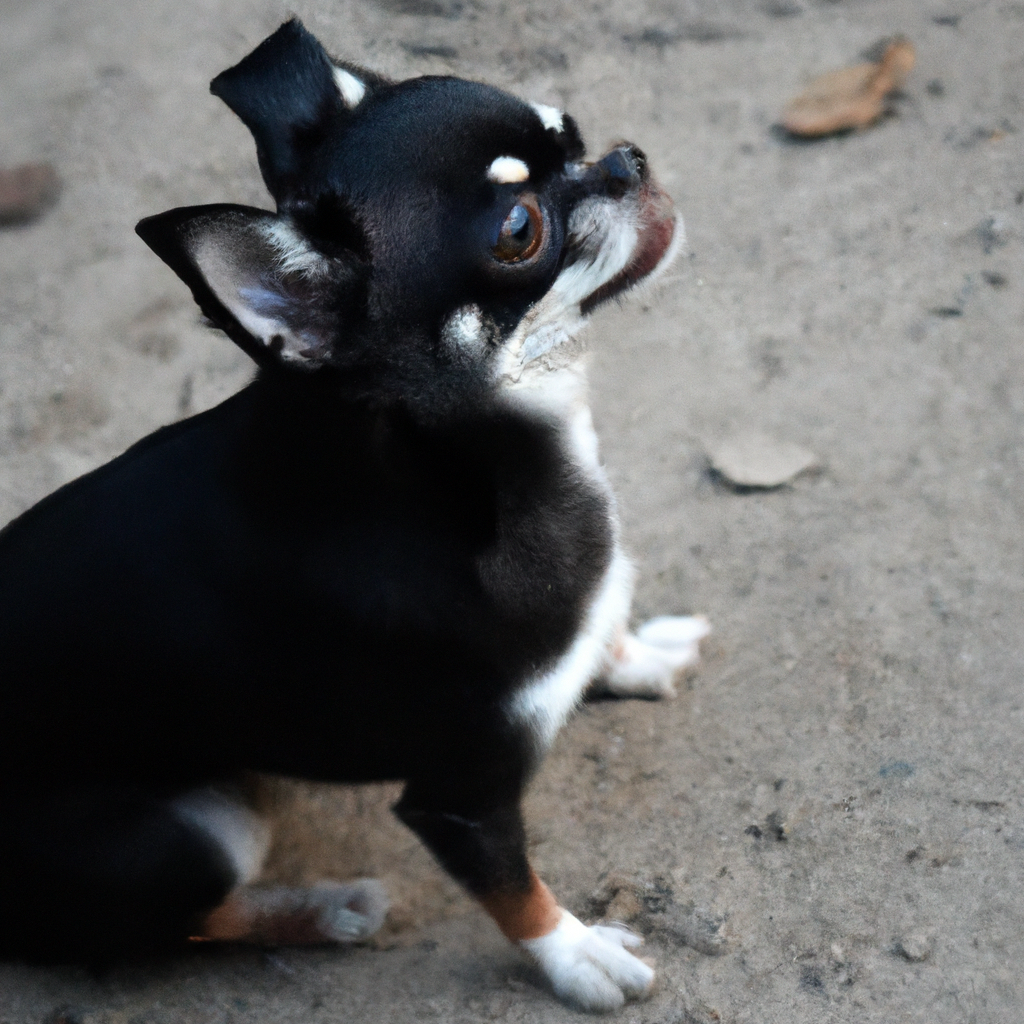

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import requests

def show_image_from_url(url = image_url):
  # Exception Handling for invalid requests
  try:
    # Creating an request object to store the response
    ImgRequest = requests.get(image_url)
    # Verifying whether the specified URL exist or not
    if ImgRequest.status_code == requests.codes.ok:
      # Opening a file to write bytes from response content
      # Storing this onject as an image file on the hard drive
      img = open("temp.jpg","wb")
      img.write(ImgRequest.content)
      img.close()
      # Opening Image file using CV2
      img = cv2.imread("temp.jpg")
      cv2_imshow(img)
    else:
      print(ImgRequest.status_code)
  except Exception as e:
    print(str(e))

show_image_from_url(url=image_url)

### **Your Turn now: Image Augementation 👀**


*   Write a script to generate 3 images out of each 1 digit image from MNIST Data set, (execute this script on only 3 diffrent images of diffrent digits)

[7, 0, 4]


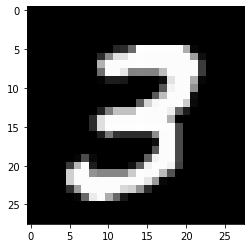

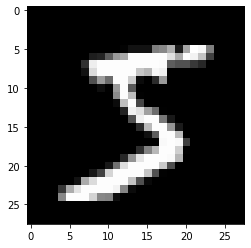

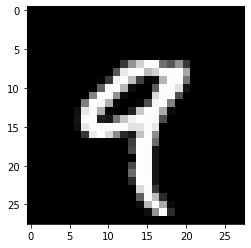

In [ ]:
#starter code
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

#define target numbers
target_numbers = [3, 5, 9]

#find an index for each number
target_images_index =  [np.where(train_y == number)[0][0] for number in target_numbers]
print(target_images_index)

#show images
for image_index in target_images_index:
  pyplot.imshow(train_X[image_index], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
train_X[image_index].shape

(28, 28)

https://oaidalleapiprodscus.blob.core.windows.net/private/org-tt8wyc5b0wXIn77VYkbIzg3T/user-lRTtRHhPaVbJFJGjLf5QrRwA/img-9UfT5fvo8hJYnhTwvHGNUSmE.png?st=2023-02-10T07%3A02%3A51Z&se=2023-02-10T09%3A02%3A51Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-02-09T21%3A38%3A17Z&ske=2023-02-10T21%3A38%3A17Z&sks=b&skv=2021-08-06&sig=tm9KUx9jc8NYQQ3P2Pr9NntOVpn/U9YF/f%2BZ%2BHAbp7g%3D


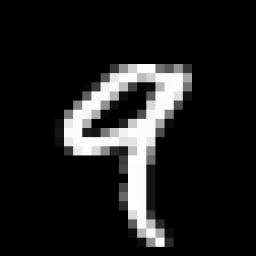

In [ ]:
#resize

resized_dimensions = (256, 256)

# Create resized image using the calculated dimensions
resized_image = cv2.resize(train_X[image_index], resized_dimensions,
                            interpolation=cv2.INTER_AREA)
#convert to rgb
im_rgb = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGBA)
#save image to load it as png
status = cv2.imwrite("temp.png", im_rgb)
response = openai.Image.create_edit(
  image=open("temp.png", "rb"),
  prompt="football shirt",
  n=1,
  size='256x256'
)
image_url = response['data'][0]['url']
print(image_url)
show_image_from_url(url=image_url)